In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [44]:
data=pd.read_csv("US_Accidents_March23.csv")
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [45]:
data.shape

(7728394, 46)

In [46]:
data.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [48]:
data.select_dtypes(include=np.number).columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [49]:
data.select_dtypes(include="object").columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [50]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [51]:
data.isnull().sum()[data.isnull().sum()!=0]

End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64

In [52]:
data["County"].value_counts()

Los Angeles        526851
Miami-Dade         251601
Orange             241275
Harris             181196
Dallas             157024
                    ...  
Mclean                  1
Poquoson (City)         1
Dewitt                  1
Frontier                1
Ness                    1
Name: County, Length: 1871, dtype: int64

In [53]:
data["City"].value_counts()

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [54]:
data["Sunrise_Sunset"].value_counts()

Day      5334553
Night    2370595
Name: Sunrise_Sunset, dtype: int64

In [55]:
data["Nautical_Twilight"].value_counts()

Day      6076156
Night    1628992
Name: Nautical_Twilight, dtype: int64

In [56]:
data["Astronomical_Twilight"].value_counts()

Day      6377548
Night    1327600
Name: Astronomical_Twilight, dtype: int64

In [57]:
data.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [58]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['ID','Source', 'Description', 'Start_Lat', 'Start_Lng', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Drop the columns
US_Accidents = data.drop(columns=columns_to_drop)

# Drop rows with null values in any column
US_Accidents = US_Accidents.dropna()

print(US_Accidents.head())

         Severity           Start_Time             End_Time    End_Lat  \
3402762         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.112060   
3402767         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.170476   
3402771         2  2016-02-08 11:51:46  2016-02-08 17:51:46  41.367860   
3402773         2  2016-02-08 15:16:43  2016-02-08 21:16:43  40.110780   
3402774         2  2016-02-08 15:43:50  2016-02-08 21:43:50  39.196150   

           End_Lng  Distance(mi)       Street         City State Country  ...  \
3402762 -83.031870         3.230  Outerbelt E       Dublin    OH      US  ...   
3402767 -84.501798         0.500       I-75 S   Cincinnati    OH      US  ...   
3402771 -81.821740         0.521       I-71 S    Cleveland    OH      US  ...   
3402773 -82.984000         0.826  Outerbelt W  Westerville    OH      US  ...   
3402774 -84.473350         0.307       I-75 N   Cincinnati    OH      US  ...   

        Junction  No_Exit  Railway  Roundabout  Station   Stop  \
34

In [59]:
US_Accidents.head(4)

,Severity,Start_Time,End_Time,End_Lat,End_Lng,Distance(mi),Street,City,State,Country,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
3402762,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.112060,-83.031870,3.230,Outerbelt E,Dublin,OH,US,...,False,False,False,False,False,False,False,False,False,Night
3402767,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.170476,-84.501798,0.500,I-75 S,Cincinnati,OH,US,...,False,False,False,False,False,False,False,False,False,Day
3402771,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.367860,-81.821740,0.521,I-71 S,Cleveland,OH,US,...,True,False,False,False,False,False,False,False,False,Day
3402773,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.110780,-82.984000,0.826,Outerbelt W,Westerville,OH,US,...,False,False,False,False,False,False,False,False,False,Day


In [60]:
US_Accidents.select_dtypes(include=np.number).columns

Index(['Severity', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')

In [61]:
US_Accidents.select_dtypes(include="object").columns

Index(['Start_Time', 'End_Time', 'Street', 'City', 'State', 'Country',
       'Weather_Timestamp', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [62]:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)
print("Top 20 Cities with the Most Accidents:")
print(top_20_cities)

Top 20 Cities with the Most Accidents:
Miami          142575
Los Angeles     79444
Orlando         74911
Dallas          50074
Houston         46198
Charlotte       40228
San Diego       32473
Raleigh         31438
Nashville       28555
Sacramento      28421
Baton Rouge     26963
Minneapolis     26649
Austin          25101
Richmond        22524
New Orleans     22323
Phoenix         21595
Tucson          21094
Atlanta         20652
Portland        20343
Saint Paul      19378
Name: City, dtype: int64


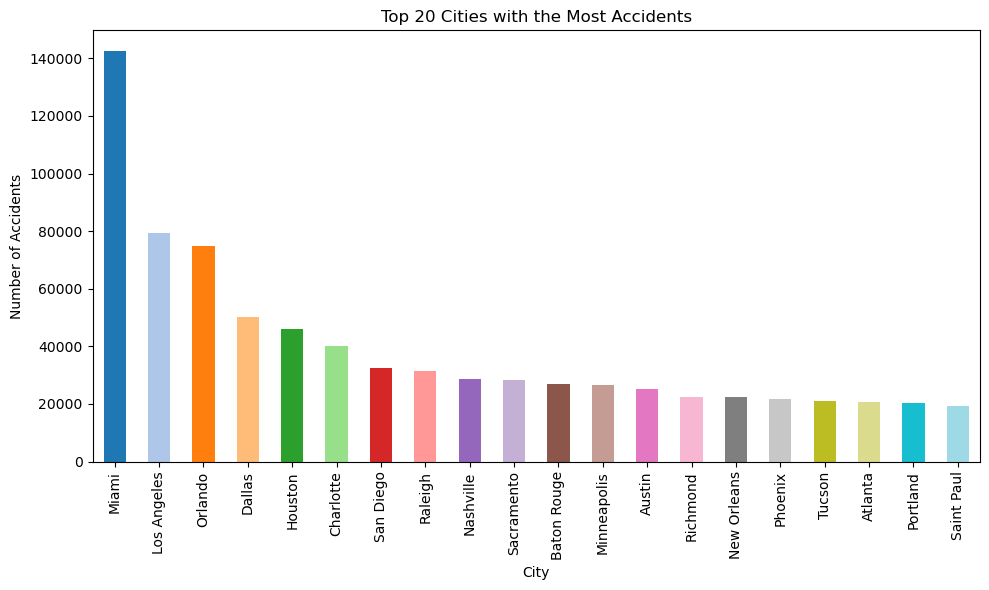

In [63]:
import matplotlib.pyplot as plt
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [64]:
accidents_by_state = US_Accidents['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)

Top 20 States with the Most Accidents:
CA    880456
FL    529393
TX    178751
VA    176331
NY    168006
PA    161697
SC    136485
NC    132011
OR    125802
MN    116616
TN     74679
AZ     73067
NJ     72341
LA     68749
MD     66544
MI     55275
GA     53580
UT     45625
IL     42194
CT     41343
Name: State, dtype: int64


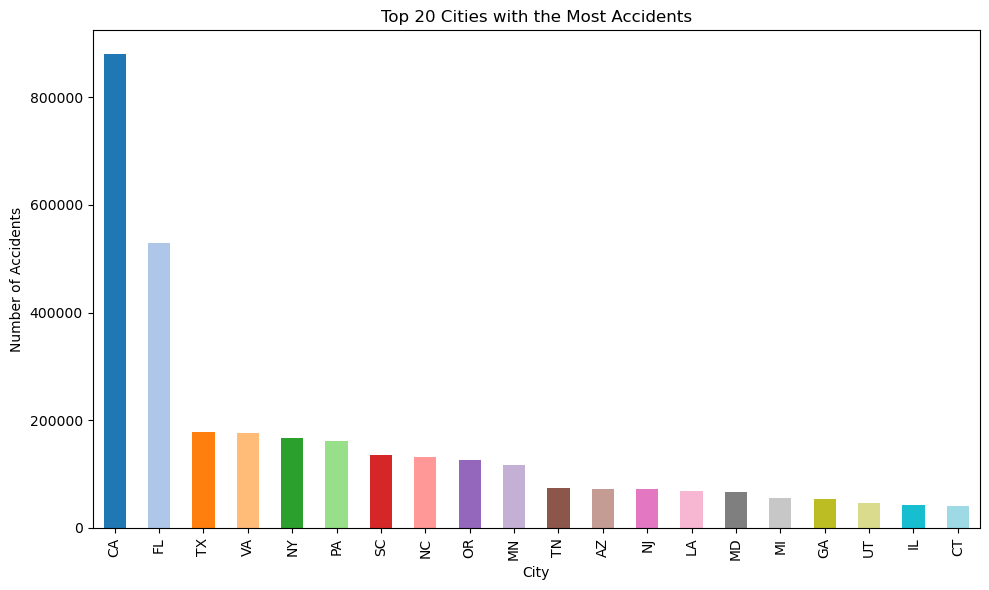

In [65]:
# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_states.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

In [66]:
# ANALYSIS OF DATE 

In [67]:
US_Accidents.columns

Index(['Severity', 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Street', 'City', 'State', 'Country',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

In [68]:
US_Accidents.select_dtypes(include="object").columns

Index(['Start_Time', 'End_Time', 'Street', 'City', 'State', 'Country',
       'Weather_Timestamp', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [69]:
US_Accidents['Start_Time'].value_counts()

2021-01-26 16:16:13              225
2021-01-26 16:17:33              156
2021-02-16 06:42:43              129
2021-11-21 18:37:51              108
2020-12-16 13:53:25               96
                                ... 
2023-01-16 16:44:13.000000000      1
2022-12-15 07:10:30.000000000      1
2022-09-07 16:09:00.000000000      1
2022-03-20 12:45:28.000000000      1
2019-08-23 18:52:06                1
Name: Start_Time, Length: 2338094, dtype: int64

In [70]:
# Convert the 'Start_Time' column to datetime object
US_Accidents.Start_Time = pd.to_datetime(US_Accidents.Start_Time, errors='coerce')

year = US_Accidents['Start_Time'].dt.year
month = US_Accidents['Start_Time'].dt.month
dayofweek = US_Accidents['Start_Time'].dt.dayofweek
hour = US_Accidents['Start_Time'].dt.hour
weekday_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek < 5]['Start_Time'].dt.hour
weekend_hour = US_Accidents[US_Accidents['Start_Time'].dt.dayofweek >= 5]['Start_Time'].dt.hour

<Axes: xlabel='Start_Time', ylabel='Count'>

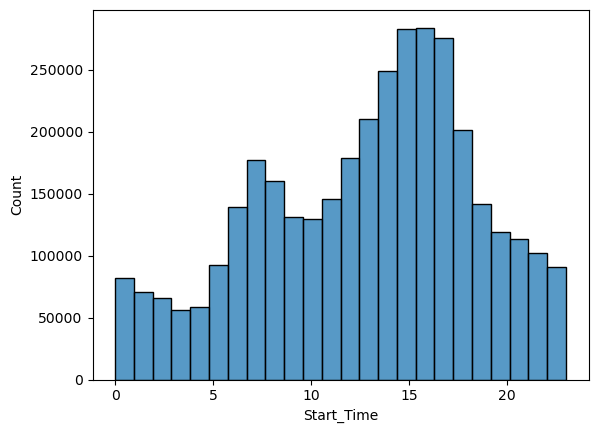

In [71]:
sns.histplot(hour, bins=24, kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

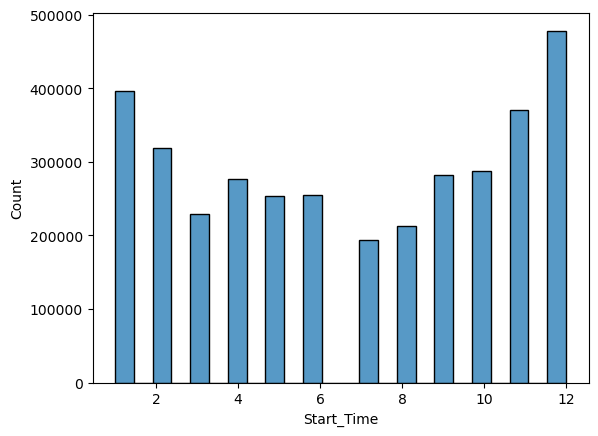

In [72]:
sns.histplot(month,bins=24,kde=False)

In [73]:
#There is an increase in accidents in winter season.
#It might have happened because of the rains and snow-fall.

<Axes: xlabel='Start_Time', ylabel='Count'>

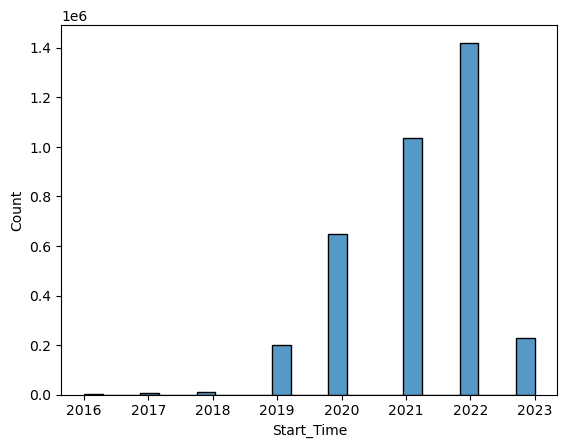

In [74]:
sns.histplot(year,bins=24,kde=False)

In [75]:
US_Accidents["Turning_Loop"].unique()

array([False])

In [76]:
#Convert Booleans Columns into binary 
# List of boolean columns
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                   'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                   'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

US_Accidents[boolean_columns] = US_Accidents[boolean_columns].astype(int)

In [77]:
#Convert Booleans Columns into binary 
# List of boolean columns
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                   'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                   'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

US_Accidents[boolean_columns] = US_Accidents[boolean_columns].astype(int)

In [78]:
US_Accidents.select_dtypes(include="object").columns

Index(['End_Time', 'Street', 'City', 'State', 'Country', 'Weather_Timestamp',
       'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

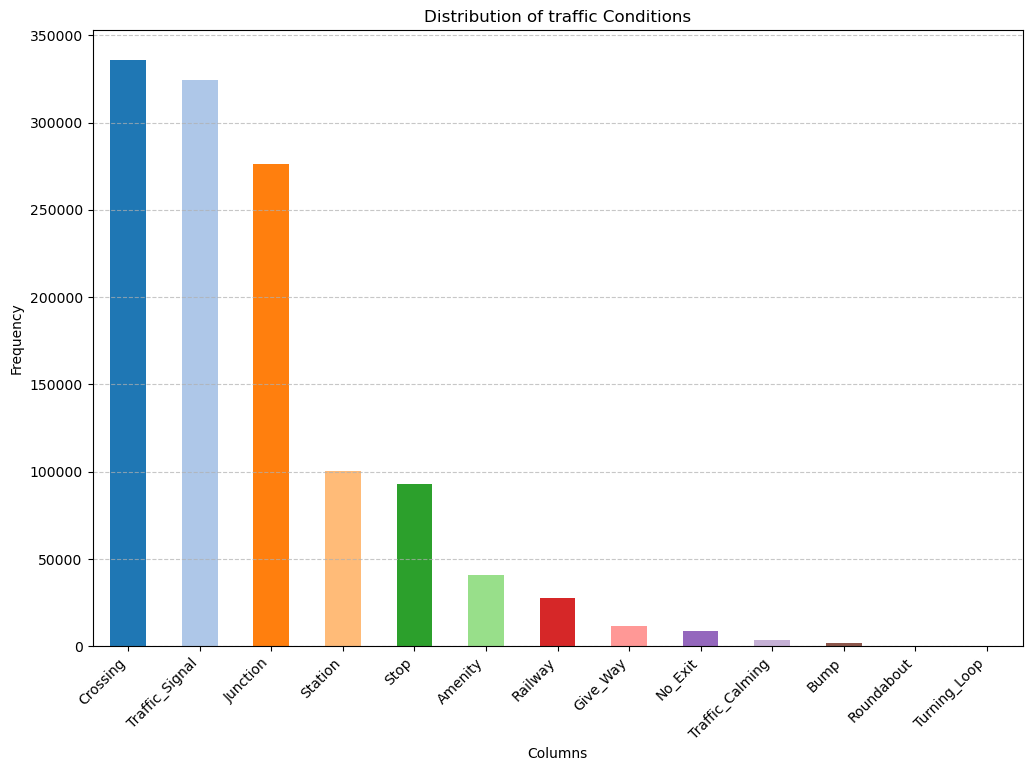

In [79]:
# Plot histograms for traffic conditions
plt.figure(figsize=(12, 8))
US_Accidents[boolean_columns].sum().sort_values(ascending=False).plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))
plt.title('Distribution of traffic Conditions')
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

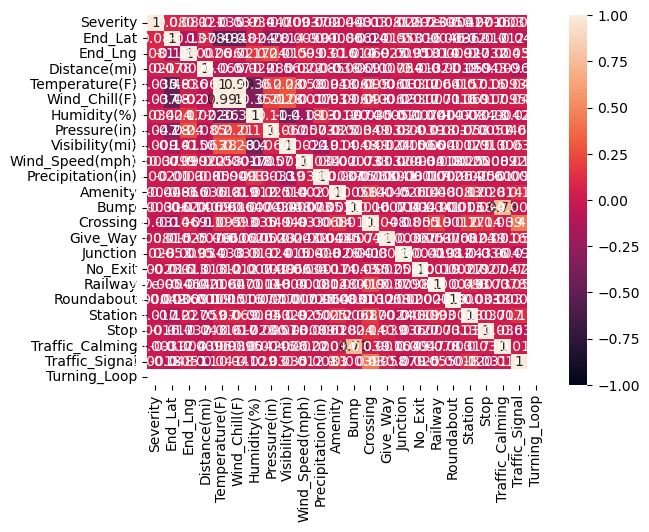

<Figure size 1200x800 with 0 Axes>

In [80]:
sns.heatmap(US_Accidents.corr(),vmax=1,vmin=-1,annot=True)
plt.figure(figsize=(12, 8))

In [81]:
states = US_Accidents['State'].value_counts().head(5) 
states
# The data indicates california is the highest accident state 

CA    880456
FL    529393
TX    178751
VA    176331
NY    168006
Name: State, dtype: int64

<Axes: ylabel='State'>

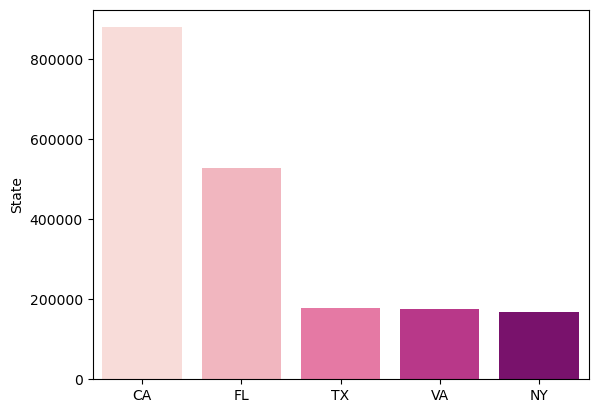

In [82]:
sns.barplot(y=states , x = states.index, palette="RdPu")

In [87]:
US_Accidents.End_Lng

3402762    -83.031870
3402767    -84.501798
3402771    -81.821740
3402773    -82.984000
3402774    -84.473350
              ...    
7728389   -117.370940
7728390   -117.153630
7728391   -117.857270
7728392   -118.395650
7728393   -117.239340
Name: End_Lng, Length: 3554564, dtype: float64

In [86]:
US_Accidents.End_Lat

3402762    40.112060
3402767    39.170476
3402771    41.367860
3402773    40.110780
3402774    39.196150
             ...    
7728389    33.998880
7728390    32.765550
7728391    33.777400
7728392    33.983110
7728393    34.137360
Name: End_Lat, Length: 3554564, dtype: float64

<Axes: xlabel='End_Lng', ylabel='End_Lat'>

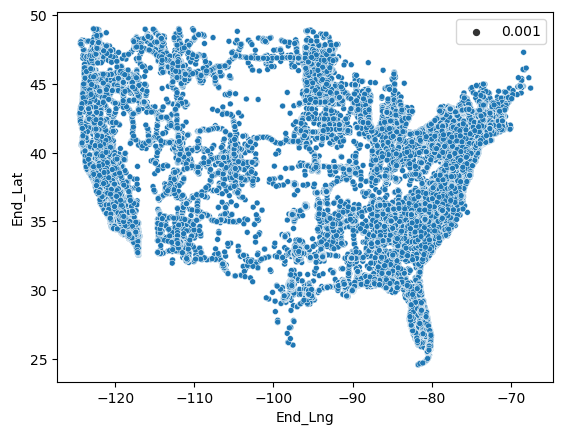

In [90]:
#a random sample of approximately 10% of the rows from the DataFrame df.
sample_df=US_Accidents.sample(int(0.1*len(US_Accidents))) 
sns.scatterplot(x=sample_df.End_Lng, y=sample_df.End_Lat, size=0.001)